In [2]:
import os, re, glob, pandas as pd, math, random

In [3]:
os.chdir("D://Scriptie//Data//lines//cleaned")
list_txt = glob.glob('*.txt')
list_txt = [f for f in list_txt if f[5:12] == "cleaned"]

In [4]:
def get_context(list_of_lines, word1):
    lines = [l for l in list_of_lines if word1 in l]
    
    output_lines = list()
    
    for el in lines:
        line_tok = el.split(" ")
        positions = [idx for idx, s in enumerate(line_tok) if word1 in s]
            
        for pos in positions:
            p = int(pos)
            s = p - 24
            e = p + 24

            if s < 0:
                s = 0
            if e > (len(line_tok) - 1):
                e = (len(line_tok) - 1)

            selection = " ".join(line_tok[s:e])
            output_lines.append(selection)
            
    return output_lines

In [10]:
# log [probability(number of times both words appears in a document together)/probability(word1)*probability(word2)]

def file_len(fname):
    with open(fname, encoding = 'utf-8') as f:
        for i, l in enumerate(f):
            pass
    return i + 1

def pmi_year(year, word1, word2):
    fn = [f for f in list_txt if int(f[0:4]) == year][0]
    

    filesize = int(os.stat(fn).st_size) / 1000000
    filelen = file_len(fn)
    
    
    if filesize > 100:
        samplesize = round(100 * filelen / filesize)
        with open(fn, encoding = 'utf-8') as f:
            lines_year = random.sample(f.read().split('\n'),samplesize)    
    
    else:
        with open(fn, encoding = 'utf-8') as f:
            lines_year = f.read().split('\n')
    
    n_w1 = len([line for line in lines_year if word1 in line]) / len(lines_year)
    n_w2 = len([line for line in lines_year if word2 in line]) / len(lines_year)
    
    lines_selection = get_context(lines_year, word1)
    n_w1_w2 = len([line for line in lines_selection if word2 in line]) / len(lines_year)
    print(str(year) + " | " + word1 + ' and ' + word2 + ' occur ' + str(len([line for line in lines_selection if word2 in line])) + ' times together in window')

    col = math.log(n_w1_w2 / (n_w1 * n_w2))
    return col

def dpmi(start_year, end_year, word1, word2):
    list_pmi = list()
    
    for year in range(start_year,(end_year + 1)):
        list_pmi.append(pmi_year(year, word1, word2))
        
    df = pd.DataFrame(list_pmi, columns = ['pmi'])
    
    df['year'] = list(range(start_year,(end_year+1)))
    
    return df

1860 | word1 and  internationale  occur 5 times together in window
1861 | word1 and  internationale  occur 10 times together in window
1862 | word1 and  internationale  occur 13 times together in window
1863 | word1 and  internationale  occur 22 times together in window
1864 | word1 and  internationale  occur 9 times together in window
1865 | word1 and  internationale  occur 29 times together in window
1866 | word1 and  internationale  occur 29 times together in window
1867 | word1 and  internationale  occur 46 times together in window
1868 | word1 and  internationale  occur 19 times together in window
1869 | word1 and  internationale  occur 32 times together in window
1870 | word1 and  internationale  occur 16 times together in window
1871 | word1 and  internationale  occur 34 times together in window
1872 | word1 and  internationale  occur 37 times together in window
1873 | word1 and  internationale  occur 24 times together in window
1874 | word1 and  internationale  occur 29 times t

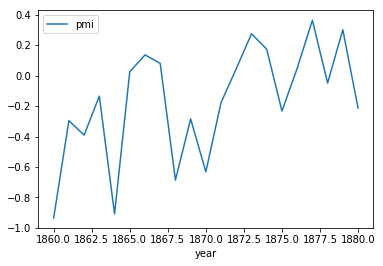

In [13]:
df = dpmi(1860, 1880, 'buitenlandsche', ' internationale ')
v = df.plot.line(x='year', y='pmi')

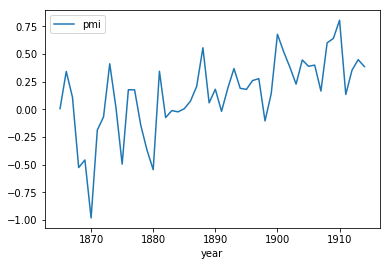

In [7]:
df.plot.line(x='year', y='pmi')